# BAIT 509: Business Applications of Machine Learning
## Lecture 9 - Ensembles, Probabilistic Forecasting, Metrics
Tomas Beuzen, 3rd February 2020

# Lecture outline
- [0. Recap (5 mins)](#0)
- [1. Lecture learning objectives](#1)
- [2. Random forests (30 mins)](#2)
- [3. Other ensemble methods (15 mins)](#3)
- [--- Break --- (10 mins)](#break)
- [4. Beyond "error rate" and "r2" metrics (20 mins)](#4)
- [5. Remaing time is to work on your final project!](#5)

# Announcements
- Assignment 2 grades released tomorrow
- Assigntment 3 **due next Friday 7th Feb, 11:59pm**

# 0. Recap  (5 mins) <a id=0></a>

- Maximal-margin classifier
- Support vector classifier
- Support vector machines
- Multi-class classification

- If our data are linearly separable, it makes sense to choose a line that maximises the space (the "margin") between the observations
- This line is called the **Maximal Margin Hyperplane**

<img src='./img/svm_2.png' width="1000"> 

- Unfortunately, our data is rarely linearly separable
- We still want to find the best line, but to find the best line we might have to poorly predict some of our data
- We penalise our classifier for predicting data poorly
- We can impose a threshold on this penalty to control the width of our margin
- The idea is to find the orientation of our line and the width of our margin to find the optimal set-up
    - A narrow margin tends towards overfitting
    - A wider margin tends towards underfitting
- We typically use cross-validation to find the optimum line & margin
- We call this model a **Support Vector Classifier**

<img src='./img/svm_4.png' width="450">

- But even these more generalised, penalty-based system, would struggle with data such as that shown below
- So we introduce the notion of a kernel to look at the relationships between our data in "higher dimensional space"
- A SVC coupled with a kernel trick is referred to as a **Support Vector Machine**

<img src='./img/svm_6.png' width="450"> 

<img src='./img/svm_8.png' width="450"> 

- Separating this data with a SVM implemented in sklearn:

<img src='./img/svm_9.png' width="450"> 

<img src='./img/svm_10.png' width="450"> 

# 1. Lecture learning objectives <a id=1></a>

- Understand how the Random Forest algorithm works
- Discuss concepts of bagging and boosting
- Describe metrics other than error and r2 for measuring ML performance

# 2. Random Forests (30 mins)<a id=2></a>

## 2.1 Motivation

- Recall that we could fit a Decision Tree with a large/unlimited `max_depth` to any dataset and get very low bias
- We say that such a model is overfit to the training data, it doesn't generalise well to new datasets, and therefore has high variance
- There is usually a trade-off between bias and variance. We learned that we could decrease the variance in this model by reducing its complexity, i.e., limiting the `max_depth`, but this in turn increases the bias.
- It's natural to wonder if there is another way we can reduce variance whilst retaining low bias.

<img src='./img/tradeoff.png' width="500">

[Source: dziganto.github.io](https://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation/) 

- One way to reduce variance is to use multiple different models to make a prediction
- An analogy is using a jury to make a decision rather than a single judge
- Consider the hypothetical situation of collecting *B* data sets (of equal size), and fitting a decision tree to each one
- These *B* models are called an ensemble
- When we want to predict a new observation we can take the average prediction of our *B* trees in the case of regression, or the mode prediction of the *B* trees in the case of classification
- This "averaging" process can reduce variance

## 2.2 Bagging (bootstrap aggregation)

- Unfortunately, collecting multiple different data sets in the real world is not practical, we usually only have one dataset to work with
- But we can emulate the collection of *B* datasets using **bootstrapping**
- A bootstrap sample is one where we randomly draw (with replacement) *n* observations from our original dataset
- We can generate as many bootstrap samples as we like!
- The resulting datasets are related in some sense, so are not as good as having *B* independent data sets. But it still gives us something useful!
- We can fit a tree on each data set, and combining the results is called "aggregation"
- So bootstrap + aggregation = bagging!

<img src='./img/bootstrap.png' width="700"> 

### Size of B

- A natural question to ask is how many bootstrap samples should you draw? (i.e., how many trees should I build in my ensemble?)
- We can’t really overfit by increasing *B*, because this just results in new data sets being generated – not fitting more and more models to a single data set
- You'll find that as B increases the error rate will drop (because we are reducing variance by using more models) until it reaches a stable point where it no longer drops
- Once this point is reached, increasing *B* does not do us much good
- You can optimise *B* using cross-validatio, but a common approach is to just use a large number (the default in sklearn for Random Forests is 100)

### What max_depth to use for each individual tree?

- The whole idea of bagging is to reduce variance
- We therefore tend to want to use indiviudal models that have low bias and high variance to aggregate together
- So we usually deliberately overfit each tree in the ensemble (i.e., no max_depth), to get trees with low bias and high variance – the variance of which will be reduced in the ensemble
- We are talking about trees here but you can of course use bagging on other models and the same ideas as discussed above apply.
- It's just that tree-based algorithms allow us to make a little trick to further improve our ensemble - this trick results in what we call a Random Forest!

## 2.3 Random Forests

- One problem with **Bagging** is that the trees in the ensemble tend to be correlated – that is, they share similarities
- We don't really want to use similar models to make our predictions - we want to use models that differ slightly, so that by averaging them, we can try and reduce variance
- **Random forests** attempt to fix this problem by introducing additional randomness into each individual tree
- Recall that, when making a split in a decision tree, we choose one feature out of the total *d* features to split on
- The idea behind **Random forests** is to consider only a random subset of the *d* features at each split
- The result is an ensemble of indiviudal trees that are less correlated and the combination of their predictions results in an overall better result
- We'll use a Random Forest shortly, but first, a few additional advantages of the method...

### Probabilistic Predictions
- When using tree-based methods, we are dealing with frequencies of class labels (at least in classification problems)
- Every leaf will have a distribution of the number of classes that falls into that leaf
- The example below is from last lecture, a tree modelling a dataset with 3 classes ("blue", "orange", "red")
- The very first node has a probability distribution of:
    - 40% chance of blue
    - 30% chance of orange
    - 30% chance of red
- Each of the leaf nodes, in this case, have 100% probability of predicting a particular class (because there is only one class evident in each leaf)
- In a RF the probability distribution is the average predicted probability for some given test data across all trees in the forest

<img src='./img/multi_class_dt_graph.png' width="450">

### Feature Importance
- Another advantage of using RFs is that they provide a measure of feature importance (which is useful for interpretability and feature selection)
- Every split in an indiviudal tree reduces the training error (if it didn't then the split wouldn't be made)
- We can measure how much each predictor reduces training error within each tree, and then average that across all trees in the forest to determine which features are most useful for modelling our data (read more [here](https://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined))

## 2.4 Quick exercise on concepts
1. Bagging is a special case of random forests under which case?
2. What are the main hyperparameters we can control for random forests (we haven't seen them yet, but conceptually, what do you think we can control)?
3. Suppose you have the following paired data of (X,y): (1,2), (1,5), (2,0). Which of the following are valid bootstrapped data sets? Why/why not?
    - (1,0), (1,2), (1,5)
    - (1,2), (2,0)
    - (1,2), (1,2), (1,5)
4. You make a random forest consisting of four trees. You obtain a new observation, and would like to predict the response. What would your prediction be in the following cases?
    - Regression: your trees make the following four predictions: 1,1,3,3.
    - Classification: your trees make the following four predictions: “A”, “A”, “B”, “C”.

## 2.5 A practical example: Predicting rain in Australia

- In this example I'll be using meteorological measurements to predict whether or not it will rain tomorrow
- This datset has not been provided on Canvas, you can download it from Kaggle [here](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


- We can see that there are quite a few missing values here
- Most sklearn algorithms won't work with missing values so we either need to remove them or fill them
- We can use `df.info()` to see exactly how many missing values there are

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 17 columns):
Date            142193 non-null object
Location        142193 non-null object
MinTemp         141556 non-null float64
MaxTemp         141871 non-null float64
Rainfall        140787 non-null float64
Evaporation     81350 non-null float64
Sunshine        74377 non-null float64
Humidity9am     140419 non-null float64
Humidity3pm     138583 non-null float64
Pressure9am     128179 non-null float64
Pressure3pm     128212 non-null float64
Cloud9am        88536 non-null float64
Cloud3pm        85099 non-null float64
Temp9am         141289 non-null float64
Temp3pm         139467 non-null float64
RainToday       140787 non-null object
RainTomorrow    142193 non-null object
dtypes: float64(13), object(4)
memory usage: 18.4+ MB


- I'm going to drop all the missing rows for this simple example
- This leaves us with 56,420 observations

In [4]:
df = df.dropna()
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


- I'm going to drop the `Data` and `Location` column
- I also need to encode my categorical data
- Usually I suggest using sklearn's OneHotEncoder for this, because it's easier to work into pipelines and combine with numeric scaling
- But here, we don't need to do numeric scaling (we are using a tree-based method)
- So I'm going to use the Panda's in-built one hot encode function, `get_dummies()`

In [5]:
X = df.drop(columns=['Date', 'Location', 'RainTomorrow'])
X = pd.get_dummies(X, drop_first=True)
y = df['RainTomorrow']
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes
5939,17.9,35.2,0.0,12.0,12.3,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0
5940,18.4,28.9,0.0,14.8,13.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0
5942,19.4,37.6,0.0,10.8,10.6,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0
5943,21.9,38.4,0.0,11.4,12.2,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0
5944,24.2,41.0,0.0,11.2,8.4,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0


- Okay lets separate that data into `X` and `y` and then into training and testing splits

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=123)

- Now let's create our model
- I'm going to use `n_estimators=100` and `max_depth=None` (note these are the default hyperparameters anyway)
- I'm not doing any hyperparameter tuning here, but you will do some in your assignment
- Don't forget about the helpful GridSearchCV function!

In [7]:
model = RandomForestClassifier(n_estimators=100, max_depth=None)

In [8]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

- We can take a look at which features are most important in our model using the `.feature_importances_` attribute

In [9]:
pd.DataFrame({'feature': X_train.columns,
              'importance':model.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
6,Humidity3pm,0.172066
4,Sunshine,0.124574
8,Pressure3pm,0.092837
7,Pressure9am,0.080156
5,Humidity9am,0.063546
12,Temp3pm,0.061743
0,MinTemp,0.061069
10,Cloud3pm,0.060286
1,MaxTemp,0.058477
11,Temp9am,0.058050


- Based on the above I might want to do some feature selection
- Let's calculate a cross-validation score on the training data

In [10]:
cv = cross_validate(model, X_train, y_train, cv=5)
print(f"Cross-validation error = {1 - cv['test_score'].mean():.2f}")

Cross-validation error = 0.15


- So let's see if we can remove some features to make our model simpler and to try and improve, or at least retain, that validation error
- I'll drop the 5 "worst" features and re-calculate the cross-validation error

In [11]:
X_train_drop = X_train.drop(columns=['RainToday_Yes', 'Cloud9am', 'Rainfall', 'Evaporation', 'MaxTemp'])
cv = cross_validate(model, X_train_drop, y_train, cv=5)
print(f"Cross-validation error = {1 - cv['test_score'].mean():.2f}")

Cross-validation error = 0.15


- Okay so we reduced our number of features without impacting cross-validation error
- Usually I would continue with this process to refine my model further, i.e., dropping features, adding new ones, etc.
- But for now, let's just test on our test data
- Don't forget to re-train your model and drop those "worst" features in the test set... (this is where pipelines come in handy! They remember these steps for you!)

In [12]:
model.fit(X_train_drop, y_train)
X_test_drop = X_test.drop(columns=['RainToday_Yes', 'Cloud9am', 'Rainfall', 'Evaporation', 'MaxTemp'])
print(f"Error on test data = {1 - model.score(X_test_drop, y_test):.2f}")

Error on test data = 0.15


- We can also calculate the probability of a particular observation
- Let's take a look at our features and come up with a typical 'dry' and 'wet' day to test our model

In [13]:
X_train_drop.head()

,MinTemp,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm
21977,17.2,11.6,83.0,76.0,1016.7,1014.4,1.0,19.7,20.7
92946,23.3,12.3,52.0,48.0,1012.3,1010.1,1.0,29.2,31.0
82137,18.5,10.7,62.0,48.0,1015.8,1011.8,1.0,24.5,27.5
64106,11.0,3.8,75.0,51.0,1008.4,1013.1,7.0,13.2,14.4
116366,14.0,11.2,35.0,26.0,1016.0,1011.7,5.0,20.7,26.3


In [14]:
dry = np.atleast_2d([18, 10, 50, 40, 1010, 1005, 1, 23, 33])
wet = np.atleast_2d([10, 2, 70, 90, 1000, 1000, 10, 11, 16])

In [15]:
pd.DataFrame({'Dry': model.predict_proba(dry)[0],
              'Wet': model.predict_proba(wet)[0]},
             index=['Rain tomorrow: No', 'Rain tomorrow: Yes'])

,Dry,Wet
Rain tomorrow: No,0.92,0.02
Rain tomorrow: Yes,0.08,0.98


# 3. Other Ensemble Methods (15 mins) <a id=3></a>

## 3.1 Voting

- Voting here is essentially what we talked about as "aggregation" previously
- It's about collecting predictions from multiple different models and aggregating them into a single prediction
- sklearn has a [`VotingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) and [`VotingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html#sklearn.ensemble.VotingRegressor) to facilitate this kind of ensembling
- Just so show you how it works, let's create a voting classifier on the rainfall data above using a `RandomForestClassifier`, `LogisticRegression` and `KNeighborsClassifier`:

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

model1 = LogisticRegression(solver='lbfgs')
model2 = KNeighborsClassifier(n_neighbors=1)
model3 = RandomForestClassifier(n_estimators=100)
voter = VotingClassifier(estimators=[
    ('lr', model1),
    ('knn', model2),
    ('rf', model3)])
voter.fit(X_train_drop, y_train)
print(f"Error on test data = {1 - voter.score(X_test_drop, y_test):.2f}")

/Users/tbeuzen/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Error on test data = 0.15


## 3.2 Boosting

- Boosting is another common ensemble method
- I will go over the basic concepts of boosting here, but encourage you to see this [blog post](https://www.gormanalysis.com/blog/gradient-boosting-explained/) if you want to learn more

### Basics
- Essentially, boosting is the opposite of bagging in the sense that we make an ensemble of models with *high bias* and *low variance*, e.g., an underfit model
- The idea is to build models sequentially to address the short-comings of the previous model
- Consider a simple two-tree boosting ensemble for regression. The boosting framework is as follows:
    1. Fit a tree to your data
    2. Record the predictions of your tree;
    3. Compute the residuals (actual minus predicted values);
    4. Fit a second tree to the residuals;
    5. Record the predictions of the second tree;
    6. Record the final prediction as the prediction of the first tree plus the prediction of the second tree
    
- This process is illustrated by the table below which is taken directly from the blog post linked above.
- Essentially, the second tree captures patterns in the data that the first tree missed, which is why boosting is so useful.

<img src='./img/boosting.png' width="700"> 

Source: [GormAnalysis](https://www.gormanalysis.com/blog/gradient-boosting-explained/)

- Boosting is about improving predictions by learning on residuals
- We therefore want to use "weak" learners to help us slowly get at the structure of the underyling the data
- The idea is to use a low-variance/high-bias model, like a decision stump, for which we can use boosting to reduce the bias

## 3.3 Current Popular Algorithms

- [XGBoost](https://xgboost.readthedocs.io/en/latest/)/[LGBM](https://lightgbm.readthedocs.io/en/latest/): these are two of the most common algorithms used in practice at the moment. These are both boosting algorithms based on decision trees that vary in their implementation (e.g., how they combine predictions, how they decide on splits, etc.)
- The above are not built into sklearn, they require separate installation as outlined in the documentation above
- Stacking: uses the predictions of various different models as inputs to another model which learns how to "aggregate" these predictions to a better prediction.

# -------- Break (10 mins) -------- <a id="break"></a>

# 4. Beyond "error rate" and "r2" metrics (20 mins)<a id=4></a>

## 4.1 Probabilistic Predictions

### Classification
- We've already looked at several examples of generating probabilistic predictions for classification algorithms (e.g., Logistic Regression, Naive Bayes, Random Forests)
- With these methods we can get a probability for each class label and plot a histogram as an approximate "probability distribution" - you'll do this in Assignment 3
- As an example, I'll use our rain forecasting model from before:

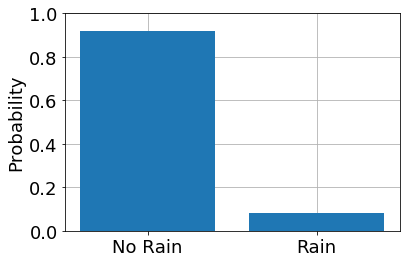

In [17]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rcParams['axes.axisbelow'] = True
predictions = model.predict_proba(dry)
plt.bar([0,1],predictions[0], tick_label=['No Rain', 'Rain'])
plt.ylim(0,1)
plt.ylabel('Probability')
plt.grid()

### Regression
- The reason probabilities are useful is because they helps us understand the uncertainty in our predictions
- You've probably already had some practice generating confidence and/or prediction intervals using linear models, perhaps using the `confint` or `predict` functions
- You may recall that confidence intervals are intervals around the expected value of Y given x: $E[Y|x]$ (they have 1 source of uncertainty, uncertainty in model parameters)
- Prediction intervals are intervals around some $\hat{y}$ given x: $\hat{y}|x$ (they have 2 sources of uncertainty, uncertainty in model parameters and uncertainty in our data)
- Prediction intervals are really what we are interested in here
- In your linear regression courses, you may have seen the following formula for calculating prediction intervals:
$$\hat{y}\pm{}t_{\frac{\alpha}{2},{n-2}}*\sqrt{MSE(1+\frac{1}{n}+\frac{(x-\bar{x}^2)}{\sum{(x_i-\bar{x}^2)}}}$$

- Unfortunately, this formula **strongly** relies on the condition that the residuals are normally distributed (which often they are not)
- An alternative strategy to forming prediction intervals that does not make assumptions on the distribution of the residuals is **quantile regression**

- Quantile regression is conceptually the same as the OLS method you've seen so far
- But instead of regressing on the conditional expectation (the mean) we fit a model to a particular quantile, e.g., the 0.5 quantile (the median), the 0.1 quantile, the 0.9 quantile, etc.
- We can easily do quantile regression with a standard linear model, using the `statsmodels` package
- The below example is adapted from the `statsmodels` docs [here](https://www.statsmodels.org/dev/examples/notebooks/generated/quantile_regression.html), predicting `food expenditure` vs `income`

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
data = sm.datasets.engel.load_pandas().data.sort_values(by='income')
x = data['income'].to_numpy()
y = data['foodexp'].to_numpy()
data.head()

,income,foodexp
40,377.058369,276.560610
171,387.319526,242.320202
170,387.319526,242.320202
193,408.339934,284.800803
172,410.998679,266.000982


- I'll leave it to you to run through the code if you're interested, I'm going to skip straight to the plot...

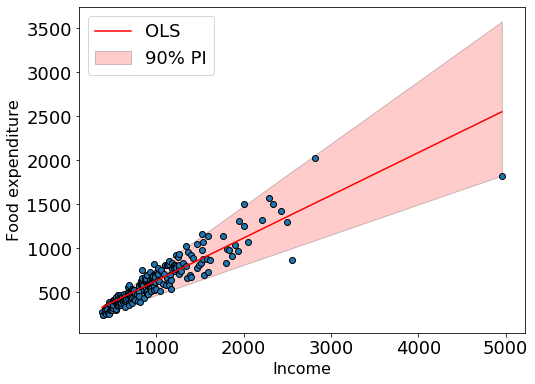

In [19]:
# Define alpha level (will draw PI between alpha and 1-alpha)
alpha = 0.95
# Get model predictions
model = smf.quantreg('foodexp ~ income', data)
y_upper = model.fit(q=alpha).predict() # prediction of alpha quantile
y_lower = model.fit(q=(1 - alpha)).predict()  # prediction of 1 - alpha quantile
y_pred = smf.ols('foodexp ~ income', data).fit().predict()  # prediction of OLS model for comparison
# plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.fill_between(x,
                 y_lower,
                 y_upper,
                 alpha=0.2, fc='red', ec='k',
                 label=str(round((alpha-(1-alpha))*100)) + '% PI')
plt.plot(x, y_pred, color='red', label='OLS')
plt.scatter(x, y, ec='k')
plt.xlabel('Income', fontsize=16)
plt.ylabel('Food expenditure', fontsize=16)
plt.legend(loc=2);

- Quantile regression has also been implemented in tree-based models
- For example, sklearn's [`GradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor) implements quantile regression, the below code is adapted from [this example](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_quantile.html)

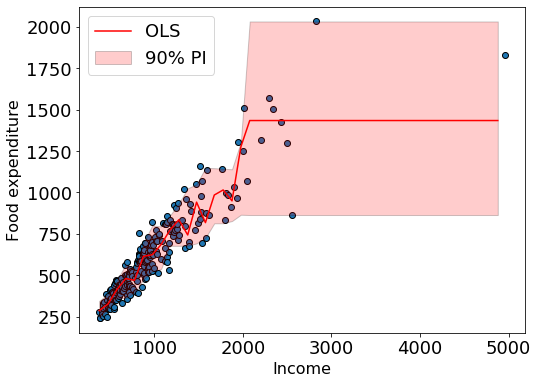

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
# create model and specify alpha level
alpha = 0.95
model = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                  n_estimators=250, max_depth=3,
                                  learning_rate=.1, min_samples_leaf=9)
x = x.reshape(-1, 1)
xx = np.arange(data.income.min(), data.income.max(), 100).reshape(-1, 1) # grid for predictions
y_upper = model.fit(x, y).predict(xx) # predictions for alpha quantile
model.set_params(alpha=1.0 - alpha) # change to 1 - alpha
y_lower = model.fit(x, y).predict(xx) # predictions for 1 - alpha quantile
model.set_params(loss='ls') # change to OLS
y_pred = model.fit(x, y).predict(xx) # predictions for OLS (mean)
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x, y, ec='k')
plt.plot(xx, y_pred, 'r-', label='OLS')
plt.fill_between(np.squeeze(xx),
                 y_upper,
                 y_lower,
                 alpha=0.2, fc='red', ec='k',
                 label=str(round((alpha-(1-alpha))*100)) + '% PI')
plt.xlabel('Income', fontsize=16)
plt.ylabel('Food expenditure', fontsize=16);
plt.legend(loc=2);

## 4.2 Classification Metrics

- Until now, we've only used error/accuracy to measure the performance of our models
- However, this is not the whole story
- It's helpful to look at the distribution of our predictions in a **confusion matrix**
- This is a table of our predictions, available in the sklearn function `plot_confusion_matrix`
- (this function was only introduced in v 0.22.1, you may need to update: `conda install scikit-learn=0.22.1`)
- I'll plot the confusion matrix for our rainfall prediction model from earlier

In [21]:
from sklearn.metrics import plot_confusion_matrix

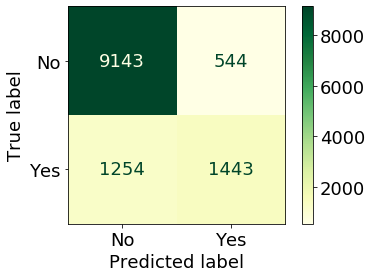

In [22]:
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=123).fit(X_train_drop, y_train)
plot_confusion_matrix(model, X_test_drop, y_test, cmap='YlGn', values_format='.0f');

- The confusion matrix helps us see where our model does well and where it does poorly
- We can see that our model predicts "No" correctly 95% of the time
- But we also see that our model predicts "No" when it does in fact rain, 48% of the time...
- Let's introduce two new metrics:
    - $Precision=\frac{TP}{TP+FP}$ (what proportion of positive predictions was actually correct?)
    - $Recall=\frac{TP}{TP+FN}$ (what proportion of true positives was identified correctly?)
- For the above confusion matrix:
    - $Precision=\frac{1443}{1443+544}=0.73$
    - $Recall=\frac{1443}{1443+1254}=0.54$
- Read more about these metrics [here](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)
- There's generally a trade-off between precision and recall: improving precision typically reduces recall and vice versa
- We typically use two other popular measures of performance known as [ROC and AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) to find the best balance (but outside the scope of this course)
- What you need to know is that "error" is not always the best metric! Looking at the confusion matrix above, we may decide to change our model so that we get more **True Positives**, we have two options here

#### Change the classification threshold!
- We can use the probabilistic predictions of our random forest classifier to make our own predictions based on some threshold
- We can get more *true positive* by decreasing our threshold (i.e., classifying more observations as positive)
- But that means we also get more *false positives*)
- This requires some manual coding...

In [23]:
from sklearn.metrics import confusion_matrix
threshold = 0.3
predicted_proba = model.predict_proba(X_test_drop)
y_predicted = (predicted_proba[:,1] >= threshold).astype('int')
confusion_matrix(y_test.replace({'Yes':1,
                                 'No': 0}), y_predicted)

array([[8080, 1607],
       [ 644, 2053]])

- In this case, my recall will go up, but my precision will go down
    - $Precision=\frac{2068}{2068+1608}=0.56$
    - $Recall=\frac{2068}{2068+629}=0.77$

#### Weight classes differently!

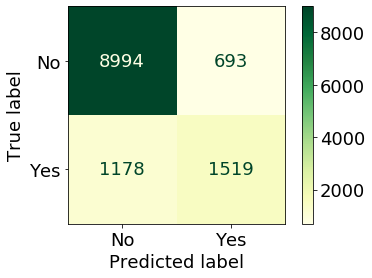

In [24]:
model = RandomForestClassifier(n_estimators=100, max_depth=None, class_weight={'Yes':1, 'No':100})
model.fit(X_train_drop, y_train)
plot_confusion_matrix(model, X_test_drop, y_test, cmap='YlGn', values_format='.0f');

## 4.3 Regression Metrics

- We only looked at one regression metric during the course: $R^2$
- But there are [many more](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)
- Some other common ones are:
    - Mean absolute error (MAE) - good if you want error to add linearly, so an error of 10 is twice as bad as an error of 5
    - Mean squared error (MSE) - good if you want to penalise outliers heavily, so an error of 10 is 4x as bad as an error of 5
    - Root-mean squared error (RMSE) - like MSE but on the same scale as the response


# 5. Remaing time is to work on your final project! <a id=5></a>